Objetivo deste código é fazer um classificador k-means

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sb 
from sklearn.cluster import KMeans
import cv2
import skimage
import skimage.exposure
import skimage.transform


Parte 1: carregar e manusear dados

Tabela 1 - Data Frame: 
                       x                    y  Class
0             continuous           continuous  C1 C2
1                    NaN                  NaN  class
2      0.851311580169851   0.9542159102452499     C1
3      0.776164050330893   0.8644563600043994     C1
4     0.7851648485105935   0.8477997286113562     C1
..                   ...                  ...    ...
135   0.2859679245784092   0.2807465963867135     C2
136  0.24329839382748195  0.26792356769091136     C2
137   0.2664718241131651  0.36308812932221546     C2
138   0.2010805499290592   0.3423546929574352     C2
139  0.17628137794165594  0.36877696060284654     C2

[140 rows x 3 columns]
Tabela Dado 1 limpa: 
            x         y
0    0.851312  0.954216
1    0.776164  0.864456
2    0.785165  0.847800
3    0.815325  0.823370
4    0.875938  0.773072
..        ...       ...
133  0.285968  0.280747
134  0.243298  0.267924
135  0.266472  0.363088
136  0.201081  0.342355
137  0.176281  0.368777

[138 

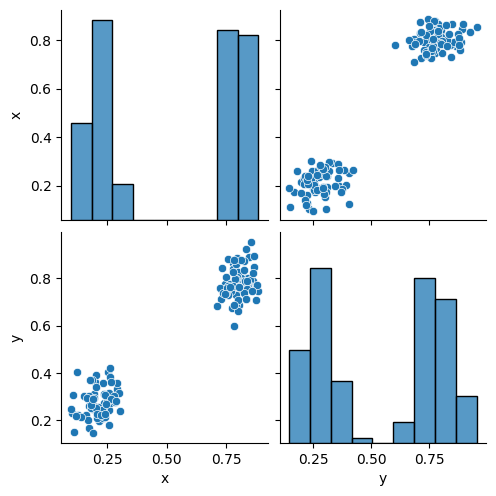

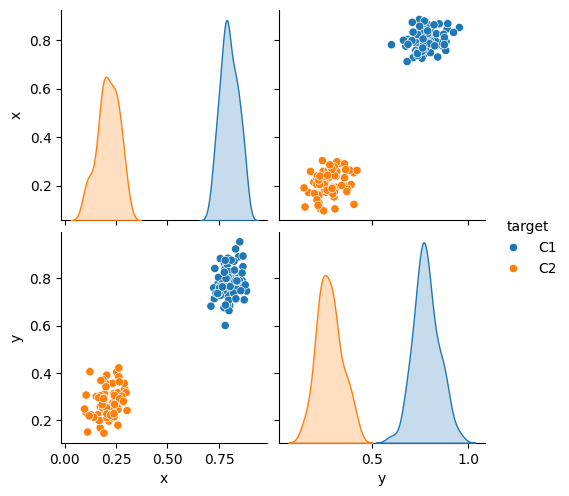

In [ ]:
# Importar dados
data_frame_1 = pd.read_csv('Painted_Data01.csv')
#data_frame_2 = pd.read_csv('Painted_Data02.csv')
#data_frame_3 = pd.read_csv('Painted_Data03.csv')
print(f'Tabela 1 - Data Frame: \n{data_frame_1}')

# to.numpy transformando arquivo DataFrame para matriz em numpy
matriz_1 = data_frame_1.to_numpy()

# Limpeza dos dados: K-means aceita apenas números e o cabeçalho
df_1_limpo = pd.DataFrame({"x": matriz_1[2: , 0].astype(float), "y": matriz_1[2: , 1].astype(float)})
print(f'Tabela Dado 1 limpa: \n{df_1_limpo}')
# Cria gráfico de dispersão dos dados -> k-means
sb.pairplot(df_1_limpo)

# Target
df_1_target = pd.DataFrame({"x": matriz_1[2: , 0].astype(float), "y": matriz_1[2: , 1]. astype(float), "target": matriz_1[2: , 2].astype(str)})
sb.pairplot(df_1_target, hue = "target") # hue: deixa colorido

# Criar matrizes para os dados limpos e para target
matriz_1_limpo = df_1_limpo.to_numpy()
matriz_1_target = df_1_target.to_numpy()

Parte 2: trabalhar com o k-means

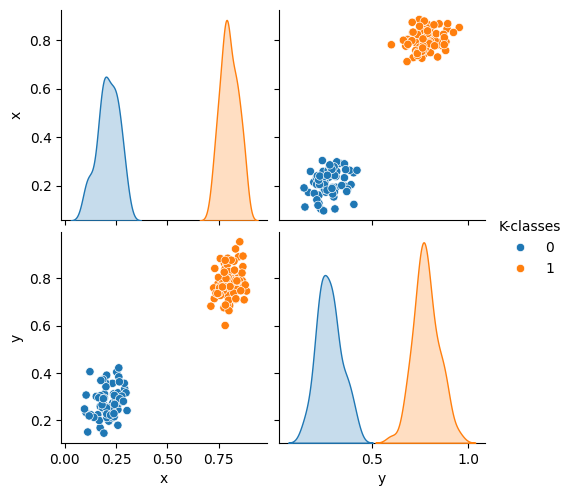

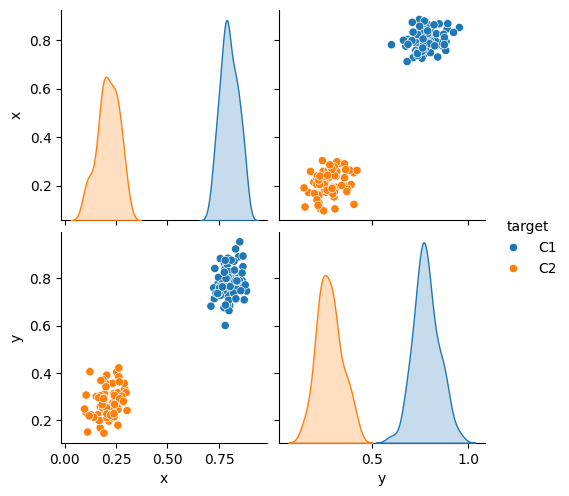

In [68]:
kmeans = KMeans(n_clusters = 2, random_state = 0)
# Analisa x e y em 'matriz_1_limpo' e calcula onde estão os centros do grupo.
kmeans.fit(matriz_1_limpo)
# Mostrar a linha de resposta: se 0 é C1, se 1 é C2(usando a lógica de aprendizado de máquina).
kmeans.labels_
# Criar uma nova coluna chamada 'k-classes' que recebe a classificação realizada pelo k-means.
df_1_limpo['K-classes'] = kmeans.labels_
# Gráfico 1: visão k-means
sb.pairplot(df_1_limpo, hue = 'K-classes')
# Gráfico 2: visão target
sb.pairplot(df_1_target, hue = 'target')

Parte 3: fazer seleção de uma classe específica

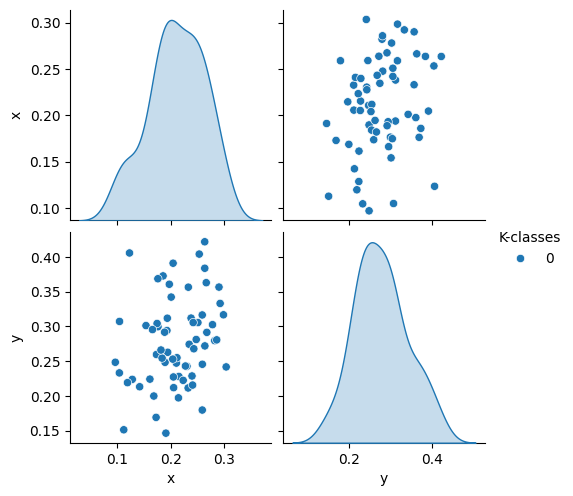

In [69]:
selecao = df_1_limpo.iloc[:, [0,1,2]]
# Nesta seleção, na coluna k-classes os dados da classe 0 são salvos em sel_0
sel_0 = selecao[selecao["K-classes"] == 0]
sb.pairplot(sel_0, hue = 'K-classes')